In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'fer2013/train'
TEST_DIR = 'fer2013/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['archive'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                            archive     label
0         fer2013/train\angry\Training_10118481.jpg     angry
1         fer2013/train\angry\Training_10120469.jpg     angry
2         fer2013/train\angry\Training_10131352.jpg     angry
3         fer2013/train\angry\Training_10161559.jpg     angry
4          fer2013/train\angry\Training_1021836.jpg     angry
...                                             ...       ...
28704  fer2013/train\surprise\Training_99916297.jpg  surprise
28705  fer2013/train\surprise\Training_99924420.jpg  surprise
28706  fer2013/train\surprise\Training_99937001.jpg  surprise
28707  fer2013/train\surprise\Training_99951755.jpg  surprise
28708  fer2013/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['archive'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['archive'])

                                            archive     label
0       fer2013/test\angry\PrivateTest_10131363.jpg     angry
1       fer2013/test\angry\PrivateTest_10304478.jpg     angry
2        fer2013/test\angry\PrivateTest_1054527.jpg     angry
3       fer2013/test\angry\PrivateTest_10590091.jpg     angry
4        fer2013/test\angry\PrivateTest_1109992.jpg     angry
...                                             ...       ...
7173  fer2013/test\surprise\PublicTest_98089595.jpg  surprise
7174  fer2013/test\surprise\PublicTest_98567249.jpg  surprise
7175  fer2013/test\surprise\PublicTest_98972870.jpg  surprise
7176  fer2013/test\surprise\PublicTest_99242645.jpg  surprise
7177  fer2013/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         fer2013/test\angry\PrivateTest_10131363.jpg
1         fer2013/test\angry\PrivateTest_10304478.jpg
2          fer2013/test\angry\PrivateTest_1054527.jpg
3         fer2013/test\angry\PrivateTest_10590091.jpg
4          fer2

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(archive):
    features = []
    for image in tqdm(archive):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train['archive'])

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\palsh\AppData\Roaming\Python\Python310\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['archive'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [21]:
model_result=model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 800, validation_data = (x_test,y_test))

Epoch 1/800
225/225 [==============================] - 16s 45ms/step - loss: 1.8248 - accuracy: 0.2459 - val_loss: 1.8160 - val_accuracy: 0.2471
Epoch 2/800
225/225 [==============================] - 9s 40ms/step - loss: 1.8048 - accuracy: 0.2537 - val_loss: 1.7910 - val_accuracy: 0.2471
Epoch 3/800
225/225 [==============================] - 9s 40ms/step - loss: 1.7473 - accuracy: 0.2763 - val_loss: 1.6662 - val_accuracy: 0.3208
Epoch 4/800
225/225 [==============================] - 9s 40ms/step - loss: 1.6429 - accuracy: 0.3415 - val_loss: 1.5234 - val_accuracy: 0.4019
Epoch 5/800
225/225 [==============================] - 9s 40ms/step - loss: 1.5374 - accuracy: 0.3983 - val_loss: 1.4019 - val_accuracy: 0.4614
Epoch 6/800
225/225 [==============================] - 9s 40ms/step - loss: 1.4614 - accuracy: 0.4338 - val_loss: 1.3408 - val_accuracy: 0.4822
Epoch 7/800
225/225 [==============================] - 9s 40ms/step - loss: 1.4069 - accuracy: 0.4549 - val_loss: 1.3064 - val_accuracy

In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

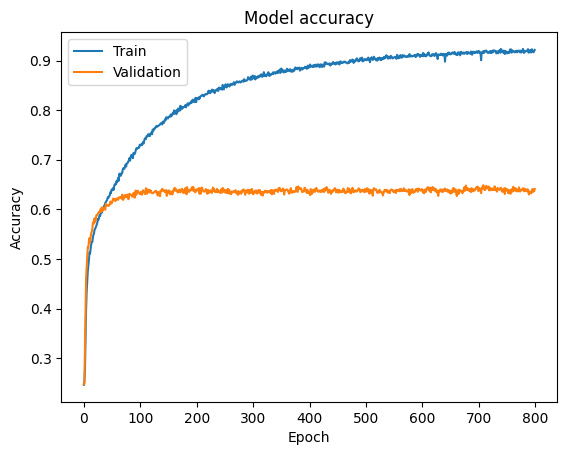

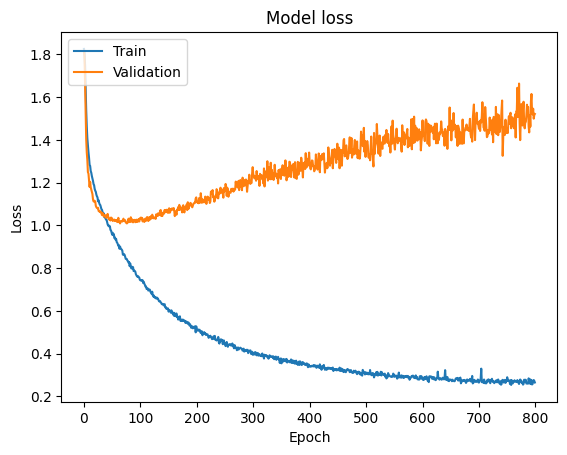

225/225 [==============================] - 1s 4ms/step
Weighted F1-score: 0.6385172784355907


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

plt.plot(model_result.history['accuracy'])
plt.plot(model_result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Assuming your model is already trained and you have the predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels if needed

# Calculate F1-score
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='weighted')

print("Weighted F1-score:", f1)
